In [ ]:
!pip install netCDF4
!pip install basemap

In [ ]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from numpy import arange, around, linspace
from matplotlib.colors import BoundaryNorm
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import cartopy.mpl.ticker as cticker


#EX1 (4 points):

Please download the file **Data_EX1.txt** here https://drive.google.com/file/d/17HIftj9hevOsFTe4WkZ1zWNtTKVlI4dH/view?usp=drive_link

In this file, the first line show the year of the observation. Then, each row is the number of days in months, from days 1 to days 31, each column is a month, from January to December.

In short, we have daily value of an observation from 01 Jan 2009 to 31 Dec 2009. value = -99 and 99 mean that they are the missing values. Remove it.

1. Plot the monthly mean of the temperature in 2009
2. Show the monthly mean values in the plot (value higher than the annual mean on top of the plot, lower than the annual mean below the plot). Please make sure that the values are not overlapped by the line plot.
3. Plot the variability (min-max) of the temperature
4. Show the minimum and maximum temperature

![](https://i.imgur.com/MyOEcn4.png)


In [ ]:
#----#----#----#----#----#----#
# EX1: Basic text processing and line plot
#----#----#----#----#----#----#

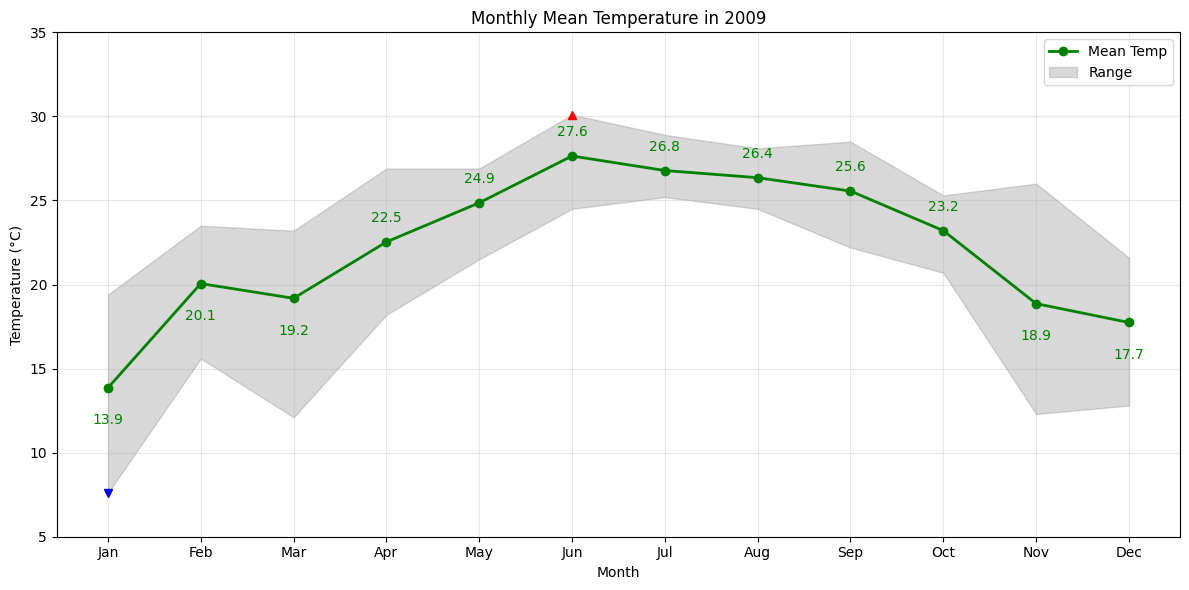

In [ ]:
with open('Data_EX1.txt', 'r') as file:
    year = int(file.readline().strip())
    monthly_data = [[] for _ in range(12)]

    for line in file:
        values = [float(x) for x in line.strip().split()[1:]]
        for month, value in enumerate(values):
            if value == 99.0 or value == -99.0:
                monthly_data[month].append(np.nan)
            else:
                monthly_data[month].append(value)

monthly_means = np.array([np.nanmean(month) for month in monthly_data])
monthly_mins = np.array([np.nanmin(month) for month in monthly_data])
monthly_maxs = np.array([np.nanmax(month) for month in monthly_data])
monthly_ranges = monthly_maxs - monthly_mins
annual_mean = np.nanmean(monthly_means)

plt.figure(figsize=(12, 6))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x = np.arange(len(months))

plt.plot(x, monthly_means, 'o-', color='green', linewidth=2, markersize=6, label='Mean Temp')
plt.fill_between(x, monthly_mins, monthly_maxs, color='gray', alpha=0.3, label='Range')

for i, mean in enumerate(monthly_means):
    y_offset = 1.0 if mean > annual_mean else -1.5
    va = 'bottom' if mean > annual_mean else 'top'
    plt.text(i, mean + y_offset, f'{mean:.1f}', ha='center', va=va, color='green')

min_month = np.nanargmin(monthly_mins)
max_month = np.nanargmax(monthly_maxs)
plt.plot(min_month, monthly_mins[min_month], 'bv')
plt.plot(max_month, monthly_maxs[max_month], 'r^')

plt.grid(True, alpha=0.3)
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title(f'Monthly Mean Temperature in {year}')
plt.xticks(x, months)
plt.ylim(5, 35)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


---

---

#EX2 (3 points):
Using the same file as excercise 1. **Draw the heatmap of temperature in 2009**
Note: the colorbar and color palette must be the same as the sample plot the get the maximum points.
![](https://i.imgur.com/A9oxj1B.png)


In [ ]:
#----#----#----#----#----#----#
# EX2: Heat map
#----#----#----#----#----#----#




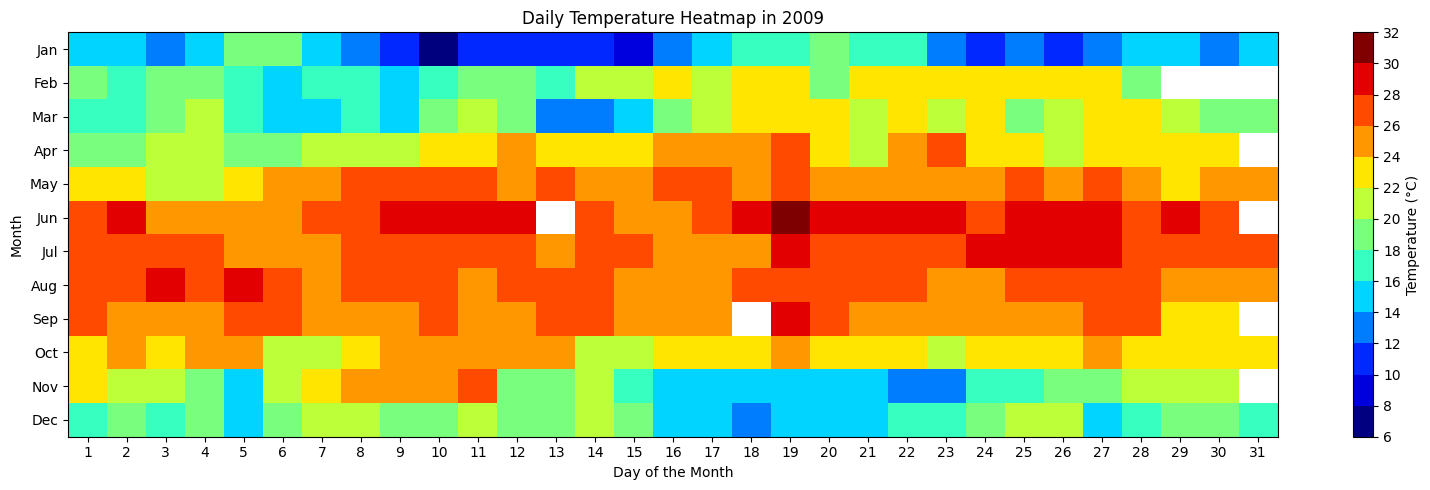

In [ ]:
daily_data = np.array([np.pad(month, (0, 31 - len(month)), constant_values=np.nan) for month in monthly_data])

levels = np.arange(6, 34, 2)
cmap = plt.get_cmap('jet')
norm = mcolors.BoundaryNorm(boundaries=levels, ncolors=cmap.N)

plt.figure(figsize=(16, 5))
c = plt.imshow(daily_data, aspect='auto', cmap=cmap, norm=norm)

cbar = plt.colorbar(c, ticks=levels, spacing='uniform')
cbar.set_label('Temperature (°C)')
cbar.ax.set_yticklabels([f'{level:.0f}' for level in levels])

plt.title(f'Daily Temperature Heatmap in {year}')
plt.xlabel('Day of the Month')
plt.ylabel('Month')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.yticks(ticks=np.arange(12), labels=months)

days = np.arange(1, 32)
plt.xticks(ticks=np.arange(31), labels=days)

plt.tight_layout()
plt.show()

---

---

#EX3 (3 points):

Using the same input file as excercise 1. Draw the boxplot for 12 months. Plot the annual mean of data

![](https://i.imgur.com/SOXkep5.png)

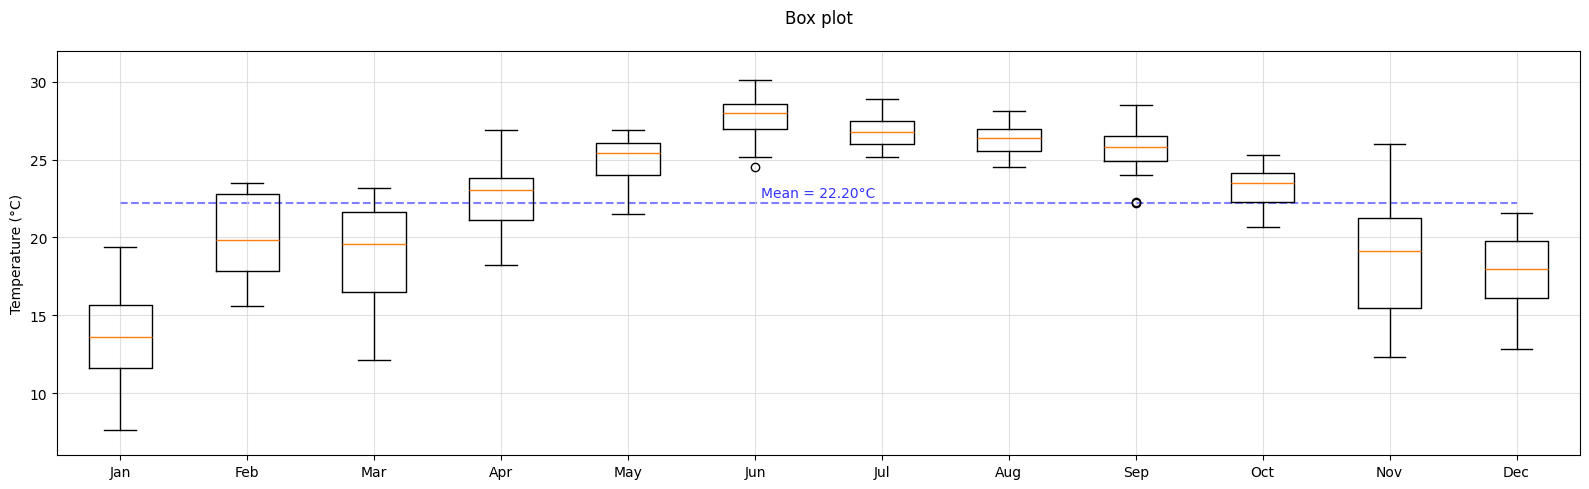

In [ ]:
#----#----#----#----#----#----#
# EX3: Box plot
#----#----#----#----#----#----#
annual_mean = np.nanmean(daily_data)

plt.figure(figsize=(16, 5))
boxes = plt.boxplot([month[~np.isnan(month)] for month in daily_data])

plt.grid(True, alpha=0.7, color='lightgray', zorder=0)
plt.plot([1, 12], [annual_mean, annual_mean], color='blue', linestyle='--', alpha=0.5, zorder=1)
plt.text(6.5, annual_mean + 0.2, f'Mean = {annual_mean:.2f}°C', color='blue', alpha=0.8, verticalalignment='bottom', horizontalalignment='center')

plt.title('Box plot', pad=20)
plt.ylabel('Temperature (°C)')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), months)
plt.ylim(6, 32)
plt.tight_layout()
plt.savefig('temperature_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()


---

---


#EX4 (3 points):
Use the netcdf file here: https://drive.google.com/uc?export=download&id=1z_5vyOMWLLD_h5gOV3RvxlsbHdCr-XXz
Load the file. Read the variable 'T2'.
1. Draw 3 maps of temperature, at [0,6,12] hour. Each color in the color bars represents a temperature change of 0.5°C. The colormaps of the first two maps are 'jet' and the last map is 'binary'.
2. Draw the borderline of Hanoi, , using the shapefile of GADM (https://gadm.org/download_country.html)
-------
![](https://i.imgur.com/ExTeime.png)

In [ ]:
#----#----#----#----#----#----#
# EX4: Basic netcdf processing
#----#----#----#----#----#----#














In [ ]:
from netCDF4 import Dataset

nc_path = './wrfout_d02_2019-11-12_sample (2).nc'
nc_file = Dataset(nc_path, 'r')

data = squeeze(nc_file.variables['T2'][:])
print('\nShape of data:', data.shape)

lat = squeeze(nc_file.variables['XLAT'][:])
lon = squeeze(nc_file.variables['XLONG'][:])
print('Shape of lat and lon:', lat.shape, lon.shape)

nc_file.close()



Shape of data: (24, 120, 111)
Shape of lat and lon: (120, 111) (120, 111)


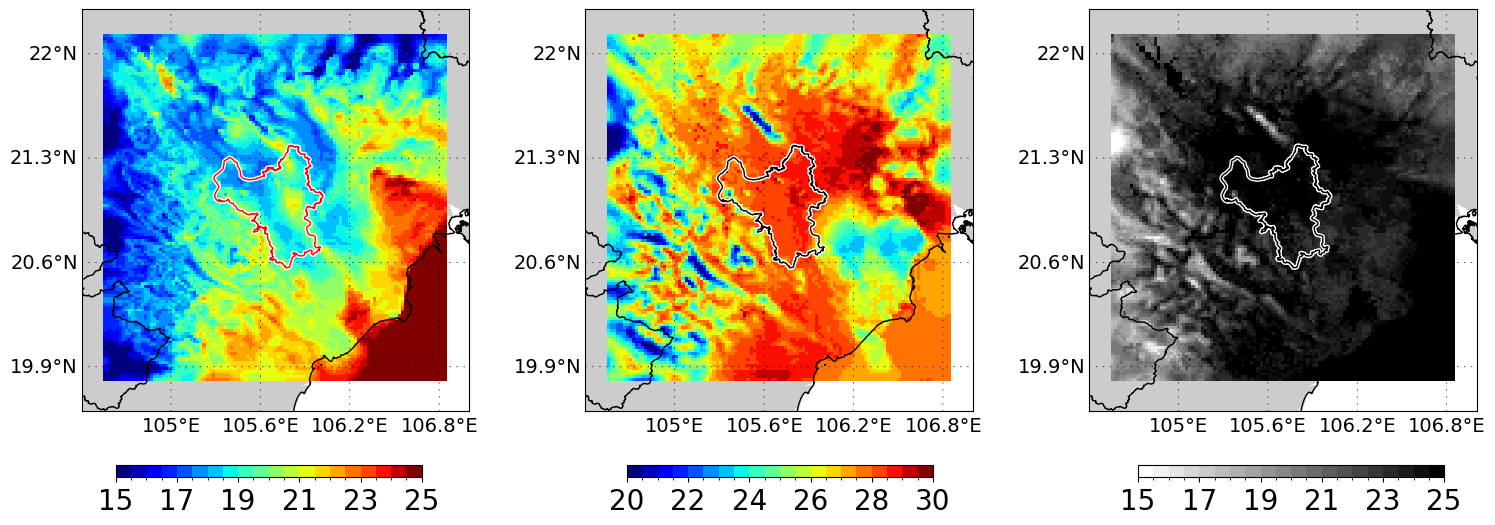

In [ ]:
lon_bounds = (104.4, 107.0)
lat_bounds = (19.6, 22.3)
shapefile_path = './gadm41_VNM_shp'

if not os.path.exists(shapefile_path):
    raise FileNotFoundError(f"Shapefile directory not found: {shapefile_path}")

lon_min, lon_max = lon_bounds
lat_min, lat_max = lat_bounds

parallels = arange(-90., 150., around((lat_max - lat_min) / 4, decimals=1))
meridians = arange(0., 180., around((lon_max - lon_min) / 4, decimals=1))

ranges = [(15, 25, 'jet'), (20, 30, 'jet'), (15, 25, 'binary')]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

data = np.random.rand(3, 50, 50) * 10 + 273.15
lon, lat = np.meshgrid(np.linspace(lon_min, lon_max, 50), np.linspace(lat_min, lat_max, 50))

for i, time in enumerate([0, 6, 12]):
    try:
        ax = axes[i]

        map_obj = Basemap(
            projection='merc',
            llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            resolution='i',
            epsg=4326,
            ax=ax
        )

        map_obj.fillcontinents(zorder=0)
        for level in [0, 1]:
            shapefile = f'{shapefile_path}/gadm41_VNM_{level}'
            map_obj.readshapefile(shapefile, f'gadm41_VNM_{level}', linewidth=1, color='k', drawbounds=(level == 0))

        for info, shape in zip(map_obj.gadm41_VNM_1_info, map_obj.gadm41_VNM_1):
            if info['NAME_1'] == 'Hà Nội':
                x, y = zip(*shape)
                color = 'red' if i == 0 else 'black'
                map_obj.plot(x, y, marker=None, color='w', linewidth=3, zorder=15)
                map_obj.plot(x, y, marker=None, color=color, linewidth=1, zorder=15)

        map_obj.drawparallels(parallels, linewidth=0.5, dashes=[2, 8], labels=[1, 0, 0, 0], fontsize=14, zorder=12)
        map_obj.drawmeridians(meridians, linewidth=0.5, dashes=[2, 8], labels=[0, 0, 0, 1], fontsize=14, zorder=12)

        if i in [0, 2]:
            levels = linspace(15, 25, 21, endpoint=True)
            v = linspace(15, 25, 6, endpoint=True)
        else:
            levels = linspace(20, 30, 21, endpoint=True)
            v = linspace(20, 30, 6, endpoint=True)
        norm = BoundaryNorm(levels, ncolors=plt.get_cmap(ranges[i][2]).N, clip=False)

        lon_map, lat_map = map_obj(lon, lat)
        cm = ax.pcolormesh(lon_map, lat_map, data[time, :, :] - 273.15, norm=norm, cmap=ranges[i][2])

        positions = [0.144, 0.428, 0.712]
        cbar = fig.add_axes([positions[i], 0.05, 0.17, 0.02])
        fig.colorbar(cm, cax=cbar, ticks=v, orientation='horizontal').ax.tick_params(labelsize=20)

    except Exception as e:
        print(f"Error processing subplot {i}: {str(e)}")
        continue

plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

#EX5 (7 points):




**ENSO**

We have an index called Nino3.4 that quantifies ENSO (El Niño-Southern Oscillation).
Nino3.4 is calculated using SST (sea surface temperature) anomalies averged over the area from 5S-5N and 170-120W in the Tropical Pacific.

***Nino3.4 extended of a month = Area average over [5S-5N and 170W-120W] of (SST of this month minus mean SST over a long period (e.g. 30 years))***

When it is large and positive, we say there is an El Nino. When it is large and negative, we say there is a La Nina. In between, we say it is neutral.

**SST**

We will use the SST Monthly Data located in: https://drive.google.com/file/d/10vJE9bbwkPCqjLtZNTC0nPQ7IPgtNJjy/view?usp=share_link

**Defining El Nino, La Nina, and Neutral**

Nino3.4 >= 1 -> El Nino

Nino3.4 <= -1 -> La Nina

Nino3.4 > -1 and Nino3.4 < 1 -> Neutral



Draw the Nino3.4 index.

![link text](https://i.imgur.com/aVO5dz2.png)

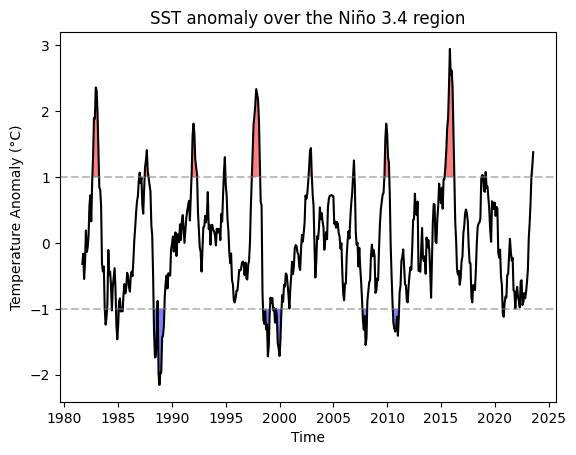

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

ds = xr.open_dataset('./sst (1).nc')
nino34_region = ds.sel(lat=slice(-5, 5), lon=slice(190, 240))
climatology = nino34_region['sst'].groupby('time.month').mean('time')
anomalies = nino34_region['sst'].groupby('time.month') - climatology
nino34_index = anomalies.mean(dim=('lat', 'lon'))
time = nino34_index.time.values

plt.figure()
plt.plot(time, nino34_index.values, 'k-')
plt.fill_between(time, nino34_index.values, 1, where=nino34_index.values > 1, facecolor='red', alpha=0.5)
plt.fill_between(time, nino34_index.values, -1, where=nino34_index.values < -1, facecolor='blue', alpha=0.5)
plt.axhline(y=1, color='gray', linestyle='--', alpha=0.5)
plt.axhline(y=-1, color='gray', linestyle='--', alpha=0.5)
plt.title('SST anomaly over the Niño 3.4 region')
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (°C)')
plt.show()

categories = np.select(
    [nino34_index >= 1, nino34_index <= -1],
    ['El Niño', 'La Niña'],
    default='Neutral'
)


Now, we would like to know more about the precipitation during the different ENSO phase.
# **Precipitation Data**

We will use the Global Precipitation Climatology Project (GPCP) Monthly Precipitation Data located in:

https://drive.google.com/file/d/10BO4_IqyBERHfWCSoBrL-y6nTpQJq-Sh/view?usp=share_link

Draw the precipitation anomaly during the different ENSO phase.
![link text](https://i.imgur.com/8nqwh1U.png)

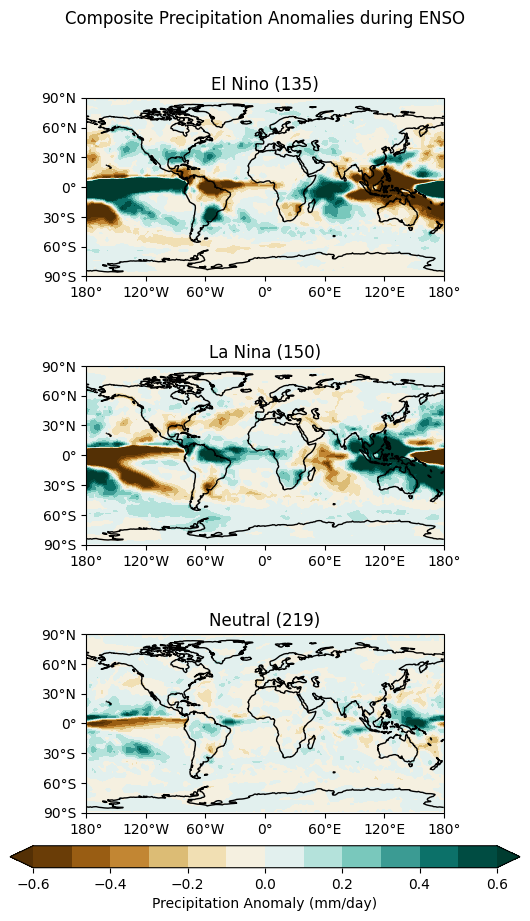

In [ ]:
sst_data = xr.open_dataset('./sst (1).nc')
precip_data = xr.open_dataset('./precip.mon.mean (1).nc')

sst_climatology = sst_data['sst'].groupby('time.month').mean('time')
sst_anomalies = sst_data['sst'].groupby('time.month') - sst_climatology
nino34_region = sst_anomalies.sel(lat=slice(-5, 5), lon=slice(190, 240))
nino34_index = nino34_region.mean(dim=['lat', 'lon'])

precip_climatology = precip_data['precip'].groupby('time.month').mean('time')
precip_anomalies = precip_data['precip'].groupby('time.month') - precip_climatology

el_nino_mask = nino34_index >= 0.5
la_nina_mask = nino34_index <= -0.5
neutral_mask = (nino34_index > -0.5) & (nino34_index < 0.5)

el_nino_comp = precip_anomalies.where(el_nino_mask, drop=True).mean('time')
la_nina_comp = precip_anomalies.where(la_nina_mask, drop=True).mean('time')
neutral_comp = precip_anomalies.where(neutral_mask, drop=True).mean('time')

n_el_nino = el_nino_mask.sum().values
n_la_nina = la_nina_mask.sum().values
n_neutral = neutral_mask.sum().values

comp_precip = [el_nino_comp, la_nina_comp, neutral_comp]
labels = ['El Nino', 'La Nina', 'Neutral']
counts = [n_el_nino, n_la_nina, n_neutral]

clevs = np.arange(-0.6, 0.7, 0.1)

fig, axs = plt.subplots(nrows=3, ncols=1, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(8.5, 11))
axs = axs.flatten()

for i, data in enumerate(comp_precip):
    cyclic_data, cyclic_lons = add_cyclic_point(data, coord=data.lon)
    cs = axs[i].contourf(cyclic_lons, data.lat, cyclic_data, clevs, transform=ccrs.PlateCarree(), cmap='BrBG', extend='both')
    axs[i].set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)
    axs[i].set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)
    axs[i].set_title(f'{labels[i]} ({counts[i]})')
    axs[i].coastlines()

fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95, wspace=0.1, hspace=0.5)
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])
fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='Precipitation Anomaly (mm/day)')
plt.suptitle('Composite Precipitation Anomalies during ENSO')
plt.show()
